In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
file_path = "/content/FINAL (1).csv"  # Update the path if needed
df = pd.read_csv(file_path)

In [ ]:
df["order_purchase_timestamp"] = pd.to_datetime(df["order_purchase_timestamp"], errors='coerce')
df["order_delivered_customer_date"] = pd.to_datetime(df["order_delivered_customer_date"], errors='coerce')

sns.set_style("whitegrid")


<ipython-input-5-3da6ad0c5be2>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_categories.values, y=top_categories.index, palette="viridis")


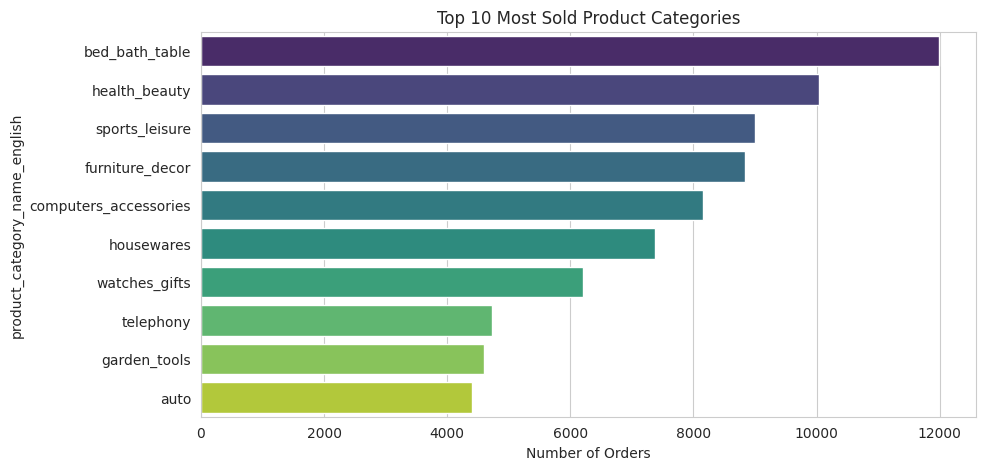

In [ ]:
top_categories = df["product_category_name_english"].value_counts().nlargest(10)
plt.figure(figsize=(10, 5))
sns.barplot(x=top_categories.values, y=top_categories.index, palette="viridis")
plt.title("Top 10 Most Sold Product Categories")
plt.xlabel("Number of Orders")
plt.show()

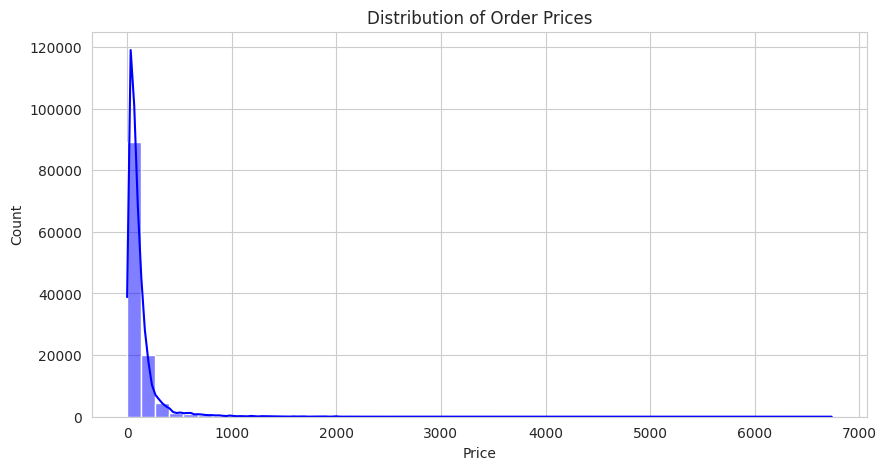

In [ ]:
plt.figure(figsize=(10, 5))
sns.histplot(df["price"].dropna(), bins=50, kde=True, color="blue")
plt.title("Distribution of Order Prices")
plt.xlabel("Price")
plt.show()

<ipython-input-8-b87f3b5992a4>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=order_status_counts.index, y=order_status_counts.values, palette="coolwarm")


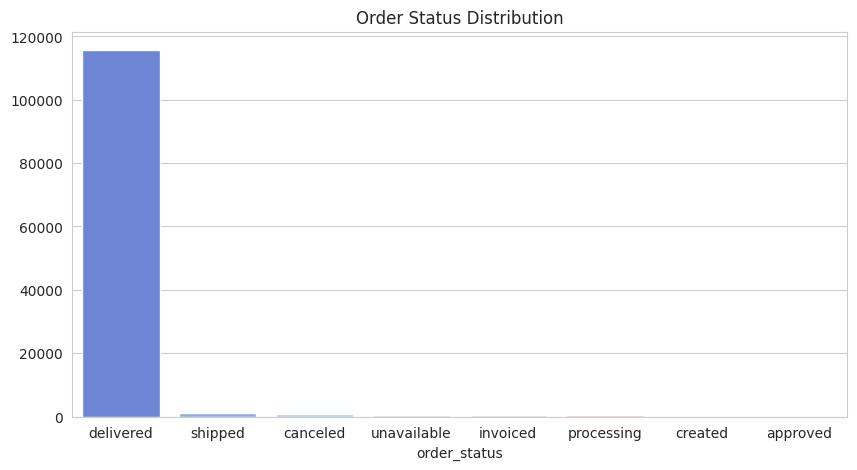

In [ ]:
order_status_counts = df["order_status"].value_counts()
plt.figure(figsize=(10, 5))
sns.barplot(x=order_status_counts.index, y=order_status_counts.values, palette="coolwarm")
plt.title("Order Status Distribution")
plt.show()

<ipython-input-9-6d0c617c9a85>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df["review_score"].dropna(), palette="magma")


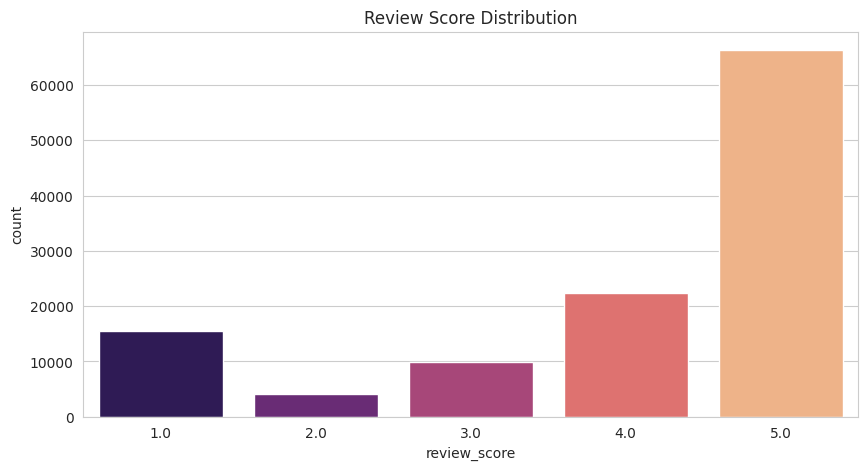

In [ ]:
plt.figure(figsize=(10, 5))
sns.countplot(x=df["review_score"].dropna(), palette="magma")
plt.title("Review Score Distribution")
plt.show()

<ipython-input-15-1419735a8436>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_avg_review.values, y=df_avg_review.index, palette="coolwarm")


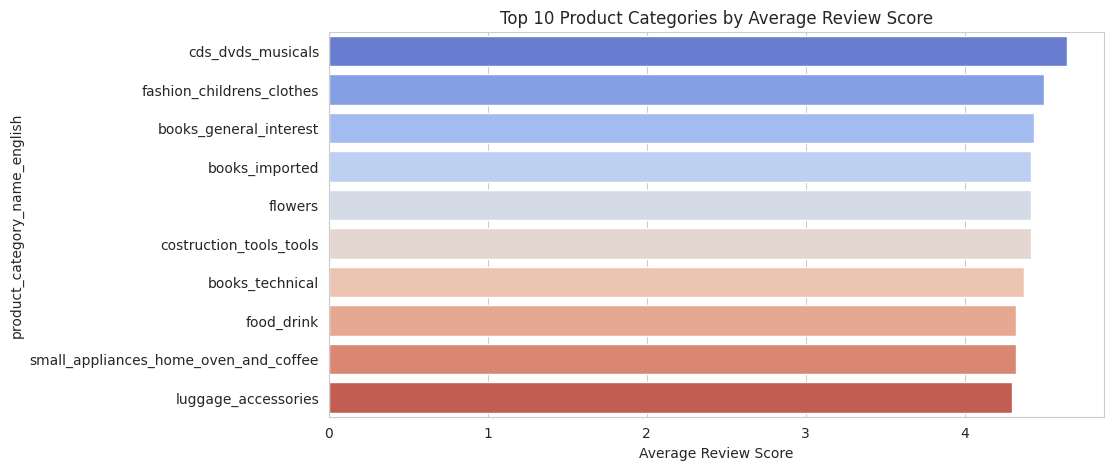

In [ ]:
df_avg_review = df.groupby("product_category_name_english")["review_score"].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 5))
sns.barplot(x=df_avg_review.values, y=df_avg_review.index, palette="coolwarm")
plt.title("Top 10 Product Categories by Average Review Score")
plt.xlabel("Average Review Score")
plt.show()

<ipython-input-16-1dfb7297d0b9>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df["review_score"], y=df["price"], palette="Set2")


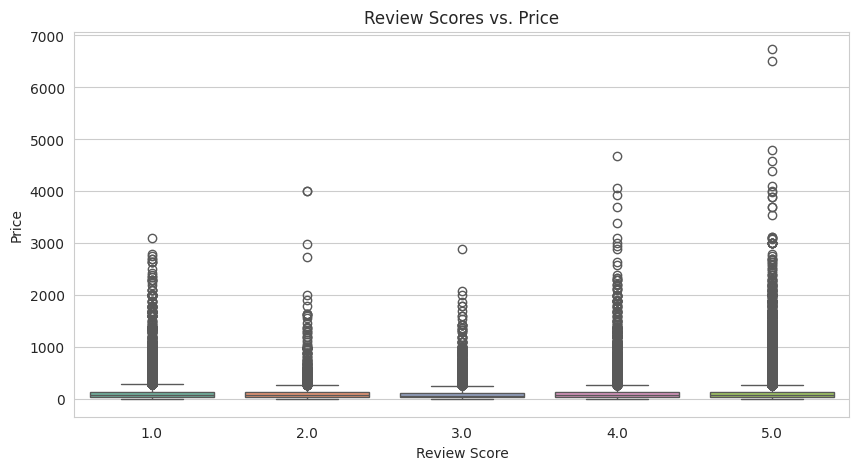

In [ ]:
plt.figure(figsize=(10, 5))
sns.boxplot(x=df["review_score"], y=df["price"], palette="Set2")
plt.title("Review Scores vs. Price")
plt.xlabel("Review Score")
plt.ylabel("Price")
plt.show()

<ipython-input-19-11377c4ed7a8>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df["review_score"], y=df["delivery_time"].dropna(), palette="muted")


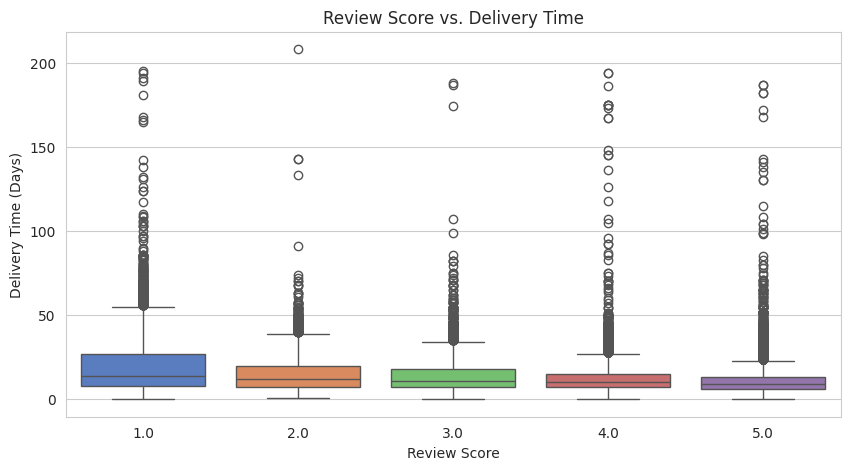

In [ ]:
df["delivery_time"] = (df["order_delivered_customer_date"] - df["order_purchase_timestamp"]).dt.days
plt.figure(figsize=(10, 5))
sns.boxplot(x=df["review_score"], y=df["delivery_time"].dropna(), palette="muted")
plt.title("Review Score vs. Delivery Time")
plt.xlabel("Review Score")
plt.ylabel("Delivery Time (Days)")
plt.show()

<ipython-input-20-3caaedb8c75c>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df_top5["product_category_name_english"], y=df_top5["review_score"], palette="viridis")


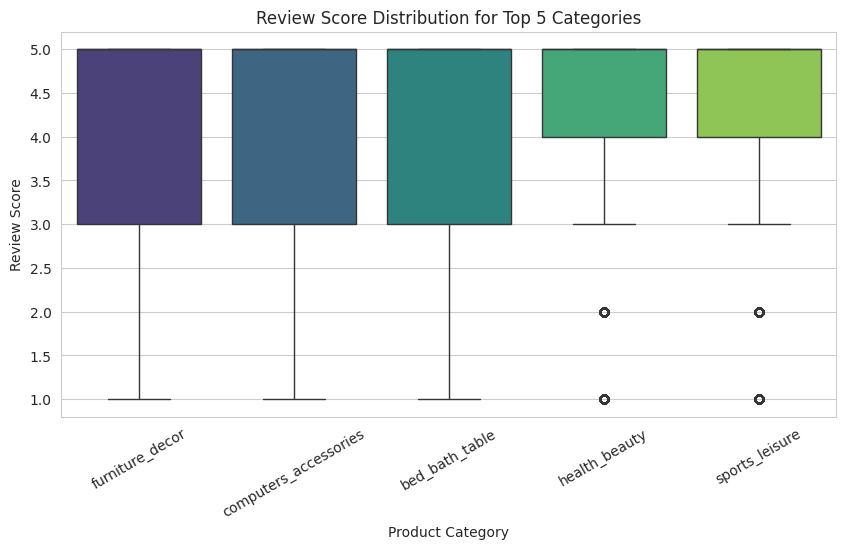

In [ ]:
top_5_categories = df["product_category_name_english"].value_counts().nlargest(5).index
df_top5 = df[df["product_category_name_english"].isin(top_5_categories)]
plt.figure(figsize=(10, 5))
sns.boxplot(x=df_top5["product_category_name_english"], y=df_top5["review_score"], palette="viridis")
plt.title("Review Score Distribution for Top 5 Categories")
plt.xlabel("Product Category")
plt.ylabel("Review Score")
plt.xticks(rotation=30)
plt.show()

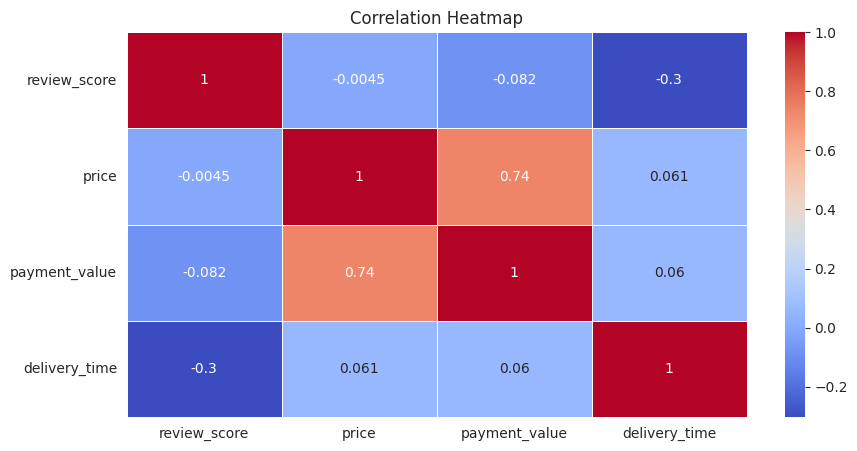

In [ ]:
plt.figure(figsize=(10, 5))
sns.heatmap(df[["review_score", "price", "payment_value", "delivery_time"]].corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()